In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

In [11]:
data = pd.read_csv("C:\DOC\info\ENSAE-Python\winemag-data_first150k.csv")

In [40]:
data.columns
data = data.drop('Unnamed: 0', axis = 1)

In [41]:
data['country'].nunique()
data['region_2'].nunique()
data['province'].count()

150925

In [42]:
data.describe()

,points,price
count,150930.000000,137235.000000
mean,87.888418,33.131482
std,3.222392,36.322536
min,80.000000,4.000000
25%,86.000000,16.000000
50%,88.000000,24.000000
75%,90.000000,40.000000
max,100.000000,2300.000000


In [44]:
data.isnull().sum()

country            5
description        0
designation    45735
points             0
price          13695
province           5
region_1       25060
region_2       89977
variety            0
winery             0
dtype: int64

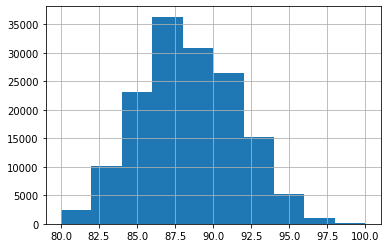

In [48]:
fig = data['points'].hist()
plt.show()

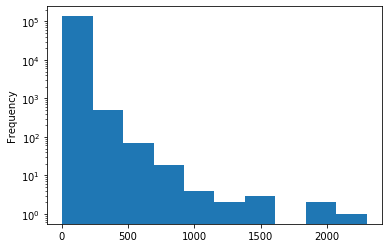

In [51]:
fig = data['price'].plot(kind = 'hist', logy=True)
plt.show()

In [54]:
data['price'][4]

66.0

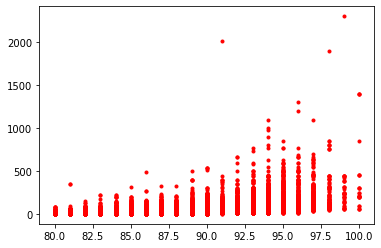

In [66]:
plt.plot(data['points'], data['price'], 'r.')

In [67]:
priceForPoint = data.groupby(by="points").mean()

In [69]:
#PriceForPoint donne la moyenne du prix de la bouteille pour un nbr de point donné

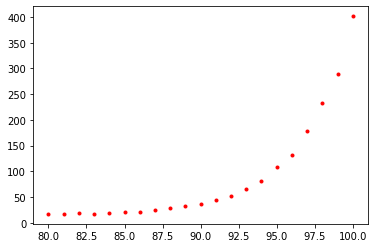

In [72]:
plt.plot(priceForPoint.index, priceForPoint , 'r.')
plt.plot()

[]

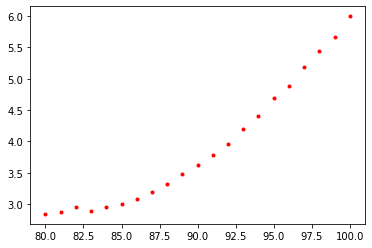

In [73]:
plt.plot(priceForPoint.index, np.log(priceForPoint) , 'r.')
plt.plot()

In [189]:
countries = data[ ["country", "winery"] ].groupby(by="country").count().sort_values(by="winery")[::-1]
countries.count()

winery    48
dtype: int64

In [82]:
data.index

RangeIndex(start=0, stop=150930, step=1)

In [99]:
data.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')

In [121]:
countries_price = data[ ["country", "price"]].groupby(by ="country").mean()

In [120]:
data[data["country"]== 'Canada']["price"].mean()

34.628865979381445

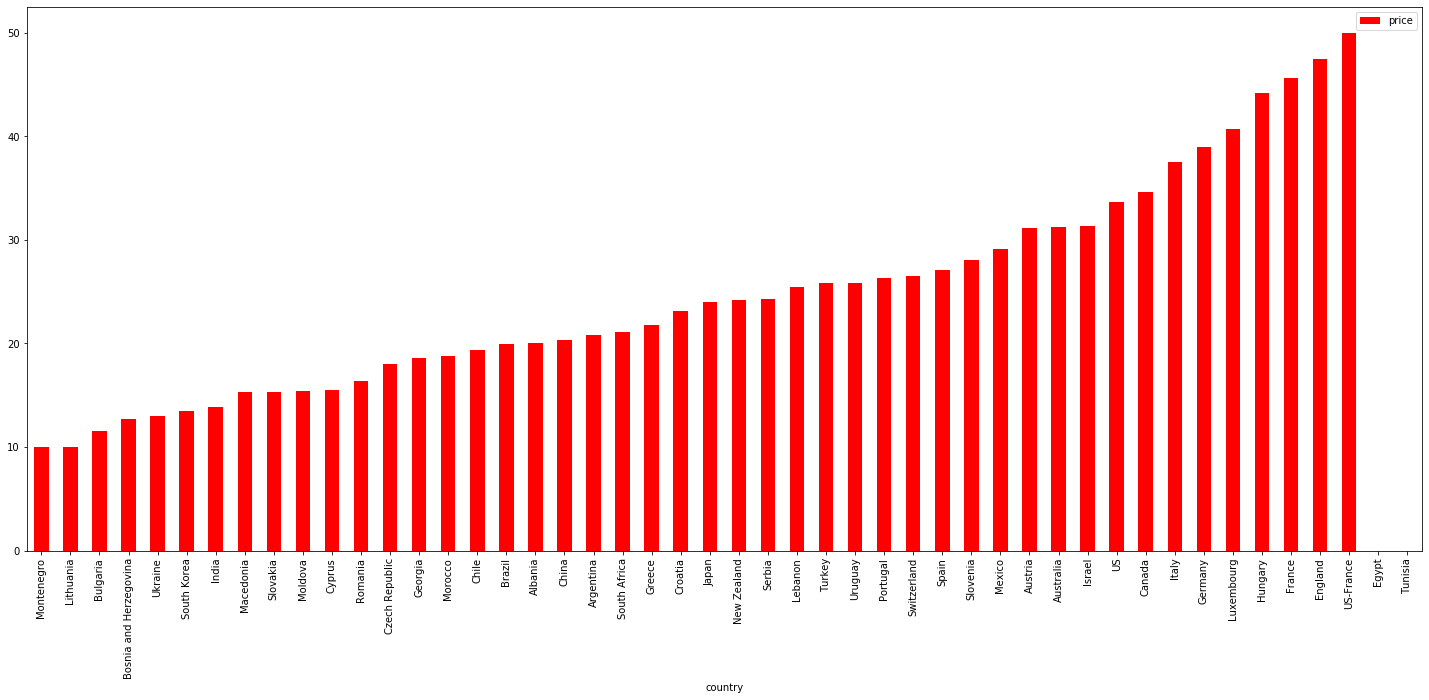

In [130]:
countries_price.sort_values('price').plot(kind = "bar", figsize = (25,10), color = 'red')

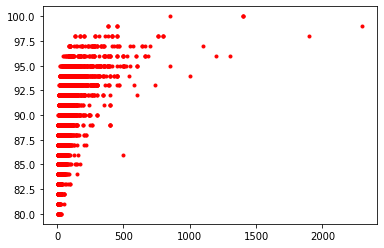

In [138]:
dfr=data[data["country"] == 'France']
plt.plot(dfr['price'],dfr['points'], 'r.')

In [185]:
dfr_max=dfr[dfr['price']> dfr['price'].quantile( q = 0.99)]

In [186]:
dfr_max=dfr_max[['region_1','winery']]

In [187]:
dfr_max.count()

region_1    148
winery      148
dtype: int64

In [188]:
dfr_max_winery = dfr_max.groupby('region_1').count().sort_values(by="winery")[::-1]
dfr_max_winery.head()

,winery
region_1,
Champagne,37
Pessac-Léognan,12
Montrachet,11
Chevalier-Montrachet,11
Pauillac,11
